# Keras Tutorial for Beginners - 1. Neural Networks

In the previous kerner (01_Neural_Networks_with_Keras_MNIST.ipynb), we used MNIST dataset (this is "Hello, world" in NN world) and it works pretty well although the design of a model is pretty simple. However, realistic problems are not easy like MNIST dataset. Much more complicated. Here, I wanto review how to use Keras to train a simple NN, but A LITTLE BIT better dataset, called "Fashion-MNIST". 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image (which is  same to MNIST, huh?), associated with a label from 10 classes. This dataset is great for benchmarking NN algorithms, especially traditional MNIST is overued. You can check [the github](https://github.com/zalandoresearch/fashion-mnist) to see the detail of Fashion-MNIST.

In this tutorial, I will directly jump to the script with Keras. Please read the previous tutorial(01_Neural_Networks_with_Keras_MNIST.ipynb), if you are not familiar with NN with Keras. I will follow the following steps to train a model:


<a href=#3>1. Neural Network with Python/Keras</a> 
<ul>
<li><a href=#3.1>1.1. Load Data</a>  </li>
<li><a href=#3.2>1.2. Preprocessing</a>  </li>
<li><a href=#3.3>1.3. Design a NN</a>  </li>
<li><a href=#3.4>1.4. Compile model</a>  </li>
<li><a href=#3.5>1.5. train model</a>  </li>
<li><a href=#3.6>1.6. Analyze results</a>  </li>
</ul>

## 1. Neural Network with Python/Keras <a name='3' />

All right. Here, I want to show a working example with Python/Keras. We will use the following simple steps to train a NN with Keras.

- (1) Load Data
- (2) Preprocessing
- (3) Design a model
- (4) Compile model
- (5) Train model
- (6) Analyze results

### 1.1. Load Data 

Fashion-MNIST data includes 10 different kinds of article images like Dress, sandal, or Bag. The dictionary list below is item's name for each label.

In [53]:
labels = {0: 'T-shirt/top', 1 : 'Trouser', 2: 'Pullover', 3 : 'Dress', 4: 'Coat' , 5: 'Sandal',
            6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

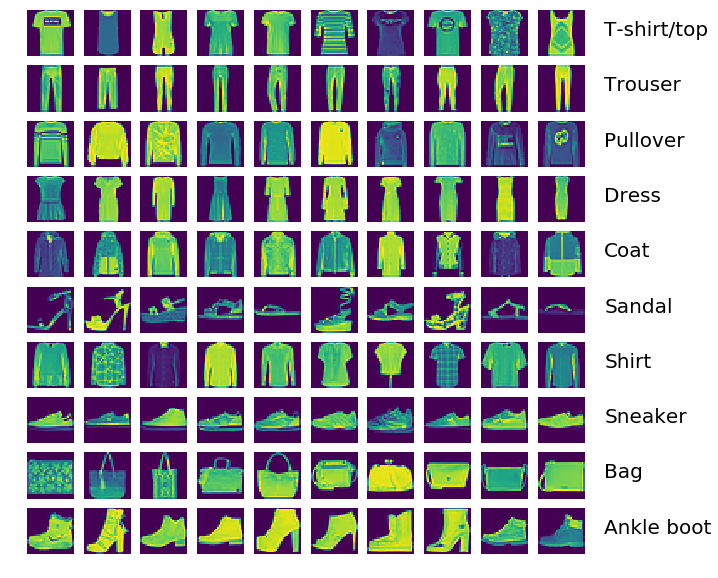

In [52]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_features, train_labels), (test_features, test_labels) = fashion_mnist.load_data()
num_classes =10
num_input_nodes = 28*28
plt.figure(figsize=(10,10))
for i in range(10):
    temp_features = train_features[train_labels==i]
    for j in range(10):
        plt.subplot(10,10,i*10+j+1)
        plt.axis('off')
        plt.imshow(temp_features[j])
    plt.text(40,15,labels[i],fontsize=20)

### 3.2. Preprocessing
The input dataset consists of 60,000 images, each of them 28 × 28 pixels. However, a regular NN isn't designed to handle 2D image data, and so we must pre-process the images by reshaping them into single-column vectors. To pre-process the images, I'll use a Keras utility called np_utils. I also use the to_categorical method to create a matrix with dummy variables for the 10 classes.

In [54]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], 28*28)
test_features = test_features.reshape(test_features.shape[0], 28*28)

# convert class labels to binary class labels
from keras.utils import np_utils

train_y = np_utils.to_categorical(train_labels, num_classes)
test_y = np_utils.to_categorical(test_labels, num_classes)

## 3. Design a model

In [74]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### 3.4. Compile model <a name='3.4' />

Next step is to configure the model for training with optimizer, loss function, and metrics. When initializing the optimizer, we can specify the learning rate (lr) which sets the relative size of the changes in weights with each training step. A larger learning rate might help you reach convergence faster, but if it is too large, you might fail to find the best minimum loss function. Conversely, if the learning rate is too small, it will fail to converge fast enough. 

In [75]:
from keras.optimizers import *

#opt = SGD(lr=0.01)
opt = RMSprop()
#opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 3.5. train model <a name='3.5' />

Finally, we are ready to train the model, specifying a batch size of 64, 20 epochs, and a validation split of 20%. You can adjust batch size and number of epochs: higher batch size or lots of epochs might take longer time.

In [76]:
## 5. Train model
batch_size=128; epoch=100
model_info  = model.fit(train_features, train_y, batch_size=batch_size, \
                   epochs=epoch, verbose=2, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 2s - loss: 0.9433 - acc: 0.6981 - val_loss: 0.6505 - val_acc: 0.7677
Epoch 2/100
 - 1s - loss: 0.6044 - acc: 0.7765 - val_loss: 0.5912 - val_acc: 0.7887
Epoch 3/100
 - 1s - loss: 0.5545 - acc: 0.7978 - val_loss: 0.5529 - val_acc: 0.7969
Epoch 4/100
 - 1s - loss: 0.5432 - acc: 0.8026 - val_loss: 0.5490 - val_acc: 0.7968
Epoch 5/100
 - 1s - loss: 0.5328 - acc: 0.8035 - val_loss: 0.5444 - val_acc: 0.7941
Epoch 6/100
 - 1s - loss: 0.5160 - acc: 0.8100 - val_loss: 0.5304 - val_acc: 0.7963
Epoch 7/100
 - 1s - loss: 0.5076 - acc: 0.8150 - val_loss: 0.5135 - val_acc: 0.8091
Epoch 8/100
 - 1s - loss: 0.4989 - acc: 0.8179 - val_loss: 0.5141 - val_acc: 0.8136
Epoch 9/100
 - 1s - loss: 0.4920 - acc: 0.8211 - val_loss: 0.5045 - val_acc: 0.8170
Epoch 10/100
 - 1s - loss: 0.4862 - acc: 0.8230 - val_loss: 0.4983 - val_acc: 0.8179
Epoch 11/100
 - 1s - loss: 0.4756 - acc: 0.8271 - val_loss: 0.4822 - val_acc: 0.8251
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.3681 - acc: 0.8677 - val_loss: 0.4075 - val_acc: 0.8584
Epoch 98/100
 - 1s - loss: 0.3688 - acc: 0.8670 - val_loss: 0.4072 - val_acc: 0.8574
Epoch 99/100
 - 1s - loss: 0.3738 - acc: 0.8641 - val_loss: 0.3982 - val_acc: 0.8583
Epoch 100/100
 - 1s - loss: 0.3704 - acc: 0.8665 - val_loss: 0.4102 - val_acc: 0.8551


### 3.6. Analyze results  <a name='3.6' />

### (1) plot learning curves

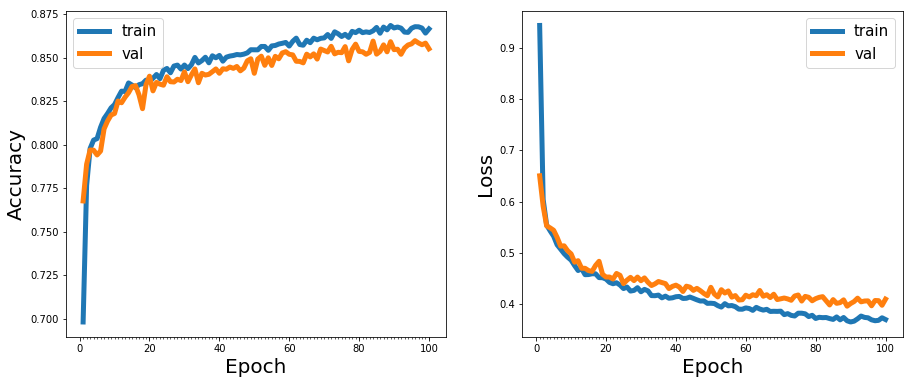

In [77]:
## plot a result
import matplotlib.pyplot as plt
import numpy as np

n = len(model_info.history['acc'])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

ax1.plot(range(1,n+1),model_info.history['acc'],linewidth=5)
ax1.plot(range(1,n+1),model_info.history['val_acc'],linewidth=5)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
ax1.set_xticks(np.arange(1,n+1),n/10)
ax1.legend(['train', 'val'], loc='best',fontsize=15)

ax2 = fig.add_subplot(122)
ax2.plot(range(1,n+1),model_info.history['loss'],linewidth=5)
ax2.plot(range(1,n+1),model_info.history['val_loss'],linewidth=5)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
ax2.set_xticks(np.arange(1,n+1),n/10)
ax2.legend(['train', 'val'], loc='best',fontsize=15)
plt.show()

In [78]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0)))
             for feature in test_features]
true_class = np.argmax(test_y, axis=1)
num_correct = np.sum(predictions == true_class) 
accuracy = float(num_correct)/test_features.shape[0]
print('Accuracy with test dataset : ' + str(accuracy))

Accuracy with test dataset : 0.8479


### (2) confusion matrix

A helpful way to assess the performance of a classification model is to check the confusion matrix. In our case, the confusion matrix has 10 rows and 10 columns (the rows being true labels and the columns being predicted labels), where each cell denotes the number of test samples that belong to that pair. If our classifier is perfect, all samples will be on the diagonal.

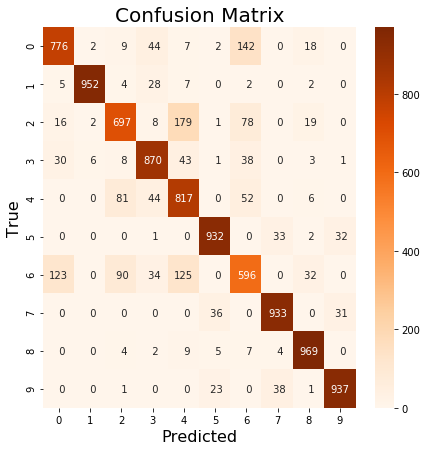

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import seaborn as sns
confusion = confusion_matrix(test_labels,predictions)
## Plot Confusion Matrix
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax = sns.heatmap(confusion, ax=ax, cmap=plt.cm.Oranges, annot=True,fmt='3d')
#    ax.set_xticklabels(range(10))
#    ax.set_yticklabels(range(10))
plt.title('Confusion Matrix',size=20)
plt.ylabel('True',size=16)
plt.xlabel('Predicted',size=16);

Done! I hope you have found this tutorial helpful, and you get to work making your own NNs to solve all kinds of problems. Good Luck! In the next tutorial, we will tackle Convolutional Neural Networks (CNNs), which are more helpful to classify image data.